# Lecture 9, Lab 0


  0%|          | 0/35 [00:00<?, ?it/s]

(-0.5, 639.5, 847.5, -0.5)

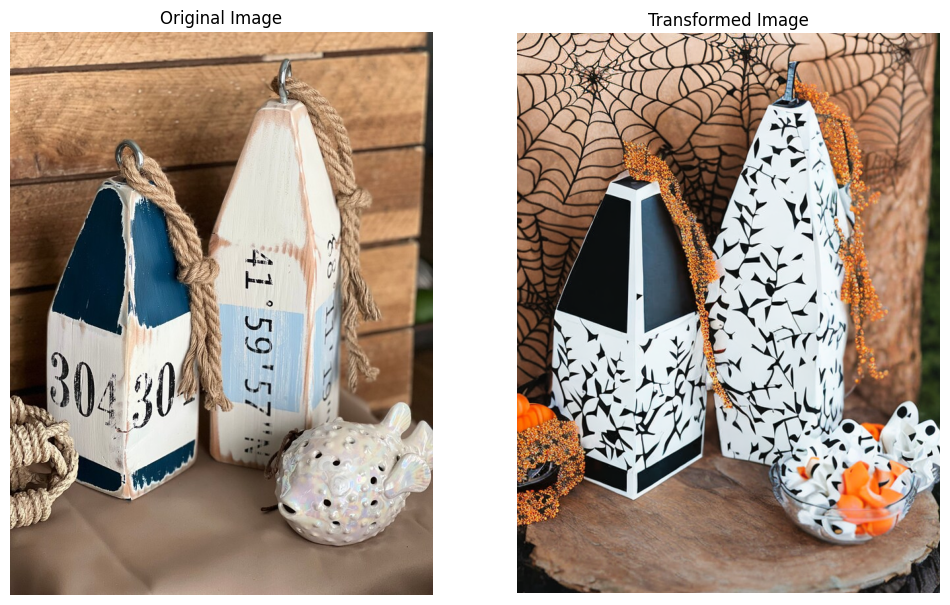

In [ ]:
#@title Require NVIDIA GPU

try:
  from diffusers import StableDiffusionDepth2ImgPipeline
except:
  print("Looks like this is the first time you're running this. Just a moment!")
  print("")
  print("")
  !pip install transformers
  !pip install diffusers
  from diffusers import StableDiffusionDepth2ImgPipeline

  import torch
  import requests
  from PIL import Image

  # Still figuring out a better way to display
  import matplotlib.pyplot as plt

try:
  pipe
except:
  pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
      "stabilityai/stable-diffusion-2-depth",
      torch_dtype=torch.float16,
  ).to("cuda")


url = "https://i.etsystatic.com/15000581/r/il/fd7bec/3833640518/il_640xN.3833640518_m9qo.jpg" #@param

init_image = Image.open(requests.get(url, stream=True).raw)

prompt = "orange halloween themed" #@param
n_prompt = "bad, deformed, ugly, bad anatomy"
trans_image = pipe(prompt=prompt, image=init_image, negative_prompt=n_prompt, strength=0.7).images[0]

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(init_image)
plt.title('Original Image')
plt.axis('off')
plt.subplot(122)
plt.imshow(trans_image)
plt.title('Transformed Image')
plt.axis('off')


# Lecture 9 - Lab 1

## Using the Keras Toolbox

You can download this exact example code from the Tensorflow / Keras website, showing you how to run Keras, a deep neural network toolbox that is used in industry today. It's plug and play, and you can immediately use it.

### Your task

 1. Adapt the following code so that it solves with a **logistic regression**.

 2. Compare against deep neural network architectures (e.g., with/without convolutions, etc.)

 3. Change the final activation to sigmoid. Right now it is the [softmax activation](https://en.wikipedia.org/wiki/Softmax_function), which is an appropriate solution. What does changing the activation do? Why would you do this?


## How do you do it?

You just need to comment out the few lines in the model construction.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
score = model.evaluate(x_test, y_test, verbose=0)

print("Final test loss:", score[0])
print("Final test accuracy:", score[1])

11490434/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)         

# Lecture 9 - Lab 2

In [ ]:
#@title Some useful utility functions

import pandas as pd
import numpy as np

def preprocess(x):
  # Preprocess the raw strings with punctuation and casing.
  # Input: x - raw string of data
  # Output: x - processed string of data
  # lowercase
  x = x.lower()
  # punctuation
  punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  for p in punctuation:
    x = x.replace(p, "")
  # words less than two letters
  x = " ".join([i for i in x.split() if not len(i) <= 2 ])
  x = x.split()
  return x

def word_doc_counts(documents):
  # Creates a dictionary for each word, and how many documents
  # it appears in a corpus.
  #
  # Input: documents - a dataframe that has each
  # Output: doc_count - a dictionary keyed by each word, and how many documents
  #.                    it appears in
  doc_count = dict()
  for line in documents:
    for term in set(line):
      if term in doc_count:
        doc_count[term] += 1
      else:
        doc_count[term] = 1
  return doc_count


In [ ]:
#@title Download [NEURIPS data](https://github.com/kapadias/medium-articles/tree/master/natural-language-processing/topic-modeling). (Alternatively, try [Quora](https://www.kaggle.com/competitions/quora-insincere-questions-classification/data?select=test.csv) or [AG News](https://www.kaggle.com/datasets/thedevastator/new-dataset-for-text-classification-ag-news/code))

dataset = 'NEURIPS' # @param ["NEURIPS", "QUORA", "AG NEWS", "OTHER"]

if dataset == 'NEURIPS':
  !wget -nc https://github.com/kapadias/medium-articles/raw/749c93d1e6373c7911d3076fa8bcc38997cef884/natural-language-processing/topic-modeling/data/NIPS%20Papers.zip
  !unzip -n "NIPS Papers.zip"
  !mv "NIPS Papers" nips_papers

  data = pd.read_csv("nips_papers/papers.csv")['abstract']
  data = data[ data.map(lambda x: x != 'Abstract Missing') ]
  data = data.reset_index(drop=True)

if dataset == 'AG NEWS':
  !rm *.csv
  !wget -nc https://course.ccs.neu.edu/cs6220/fall2023/lecture-9/agnews/archive.zip
  !unzip -n archive.zip

  # The News Dataset
  data = pd.read_csv("test.csv")['text']

if dataset == 'QUORA':
  !wget -nc https://course.ccs.neu.edu/cs6220/fall2023/lecture-9/quora/test.csv.zip
  !unzip -n test.csv.zip

  # The Quora Dataset
  data = pd.read_csv("test.csv")['question_text']

ndocs_ = len(data)
data = data.map(preprocess)
word_doc_counts_ = word_doc_counts(data)


File ‘NIPS Papers.zip’ already there; not retrieving.

Archive:  NIPS Papers.zip
   creating: NIPS Papers/
  inflating: NIPS Papers/authors.csv  
  inflating: NIPS Papers/paper_authors.csv  
  inflating: NIPS Papers/papers.csv  


In [ ]:
def tf(x):
    # Calculate the term frequencies for every term in a string
    term_frequencies = []
    document_length = len(x)
    for term in x:
        term_frequencies.append(x.count(term) / document_length)
    return np.array(term_frequencies)

def idf(line, wd_counts, ndocs):
    # From a string to an array of document frequencies for each word
    return np.array([ndocs / wd_counts[term] for term in line])

def logidf(x):
    # Take the log of the document frequencies
    return np.log(x)

# Calculate term frequencies for each document
term_frequencies = [tf(doc) for doc in data]

# Calculate document frequencies for each document
doc_frequencies = [idf(doc, word_doc_counts_, ndocs_) for doc in data]

# Calculate log of document frequencies
log_idfrequencies = [logidf(df) for df in doc_frequencies]

# Calculate TF-IDF scores
tfidfs = [tf * logidf for tf, logidf in zip(term_frequencies, log_idfrequencies)]

In [ ]:
#@title Test out what are the highest TFIDF terms in each document

def highest_tfidfs(documents, tfidfs_values, index):
  return (max(zip(data[index], tfidfs_values[index]),
              key = lambda x: x[1] ),
          " ".join(data[index]))

docnum = 231 #@param

highest_tfidfs(data, tfidfs, docnum)


(('fpga', 0.19450281383545717),
 'present new massively parallel architecture for accelerating machine learning algorithms based arrays variableresolution arithmetic vector processing elements vpe groups vpes operate simd single instruction multiple data mode and each group connected independent memory bank this way memory bandwidth scales with the number vpe and the main data flows are local keeping power dissipation low with 256 vpes implemented two fpga field programmable gate array chips obtain sustained speed gmacs billion multiplyaccumulate per sec for svm training and gmacs for svm classification this performance more than order magnitude higher than that any fpga implementation reported far the speed one fpga similar the fastest speeds published graphics processor for the mnist problem despite clock rate the fpga that six times lower high performance low clock rates makes this massively parallel architecture particularly attractive for embedded applications where low power diss

# Lecture 9 - Lab 3

In [ ]:
!pip install lda

import numpy as np
import lda
import lda.datasets
X = lda.datasets.load_reuters()
vocab = lda.datasets.load_reuters_vocab()
titles = lda.datasets.load_reuters_titles()
print(X.shape, X.sum())

model = lda.LDA(n_topics=20, n_iter=1500, random_state=1)
model.fit(X)  # model.fit_transform(X) is also available
topic_word = model.topic_word_  # model.components_ also works

n_top_words = 8
for i, topic_dist in enumerate(topic_word):
  topic_words = np.array(vocab)[np.argsort(topic_dist)][:-(n_top_words+1):-1]
  print('Topic {}: {}'.format(i, ' '.join(topic_words)))

# The document-topic distributions are available in model.doc_topic_.
doc_topic = model.doc_topic_
for i in range(10):
  print("{} (top topic: {})".format(titles[i], doc_topic[i].argmax()))

# Lecture 9, Lab 4

In [ ]:
#@title Make sure to setup runtime with a GPU

print("Importing libraries since this is the first time you've run this!")
from PIL import Image
import requests
import pandas as pd
import torch
import numpy as np
import ipywidgets as ipyw

# Machine learning imports
!pip install diffusers==0.11.1 transformers ftfy accelerate
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-large-patch14")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-large-patch14")


In [ ]:
#@title Specify your inputs: image URL and list of text

image_url = "https://i.etsystatic.com/6329281/r/il/8be9d0/246499951/il_640xN.246499951.jpg" #@param
object_or_taxo = ["sculpture", "crystal tiger", "runny nose", "red river", "golden spire", "restaurant bar and scene"] #@param

In [ ]:
image_url = "<Your Image URL>"

# Download and prepare the image
image = Image.open(requests.get(image_url.replace("1588", "640"), stream=True).raw)

# Prepare the text prompts
prompts = ["<Your Prompt 1>", "<Your Prompt 2>", "..."]

# Ingest text and image into the model
inputs = processor(text=prompts, images=image, return_tensors="pt", padding=True)
outputs = model(**inputs)

# Extract text and image embeddings
text_embeddings = outputs.text_embeddings.detach().numpy()
image_embeddings = outputs.image_embeddings.detach().numpy()

# Normalize the embeddings
text_embeddings = text_embeddings / np.linalg.norm(text_embeddings, axis=1, keepdims=True)
image_embeddings = image_embeddings / np.linalg.norm(image_embeddings)

# Calculate cosine similarity and find the best match
cosine_similarities = np.dot(text_embeddings, image_embeddings.T)
best_match_index = np.argmax(cosine_similarities)

# The best matching text prompt
best_match_prompt = prompts[best_match_index]

print("Best matching text prompt:", best_match_prompt)

array([[0.27360982, 0.22103326, 0.1283335 , 0.20826429]], dtype=float32)